In [200]:
import numpy as np
import pandas as pd
from scipy import stats
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt 
import acquire as acq
import prepare as prep
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
alpha=0.05

In [201]:
telco=acq.get_telco_data()

In [247]:

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   gender                                  7043 non-null   object 
 2   senior_citizen                          7043 non-null   int64  
 3   partner                                 7043 non-null   object 
 4   dependents                              7043 non-null   object 
 5   tenure                                  7043 non-null   int64  
 6   phone_service                           7043 non-null   object 
 7   multiple_lines                          7043 non-null   object 
 8   online_security                         7043 non-null   object 
 9   online_backup                           7043 non-null   object 
 10  device_protection                       7043 non-null   obje

In [202]:
telco=prep.prep_telco(telco)

In [203]:
telco=telco.rename(columns={"contract_type_Month-to-month":"no_contract"})
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 58 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7043 non-null   object 
 1   gender                                  7043 non-null   object 
 2   senior_citizen                          7043 non-null   int64  
 3   partner                                 7043 non-null   object 
 4   dependents                              7043 non-null   object 
 5   tenure                                  7043 non-null   int64  
 6   phone_service                           7043 non-null   object 
 7   multiple_lines                          7043 non-null   object 
 8   online_security                         7043 non-null   object 
 9   online_backup                           7043 non-null   object 
 10  device_protection                       7043 non-null   obje

In [7]:
telco['monthly_charges']

0       65.60
1       59.90
2       73.90
3       98.00
4       83.90
        ...  
7038    55.15
7039    85.10
7040    50.30
7041    67.85
7042    59.00
Name: monthly_charges, Length: 7043, dtype: float64

In [8]:
# No NULLS WERE FOUND
telco.isnull().sum()

customer_id                               0
gender                                    0
senior_citizen                            0
partner                                   0
dependents                                0
tenure                                    0
phone_service                             0
multiple_lines                            0
online_security                           0
online_backup                             0
device_protection                         0
tech_support                              0
streaming_tv                              0
streaming_movies                          0
paperless_billing                         0
monthly_charges                           0
total_charges                             0
churn                                     0
payment_type                              0
internet_service_type                     0
contract_type                             0
gender_encoded                            0
partner_encoded                 

## Do clients with contracts churn less than clients  with month-to-month?

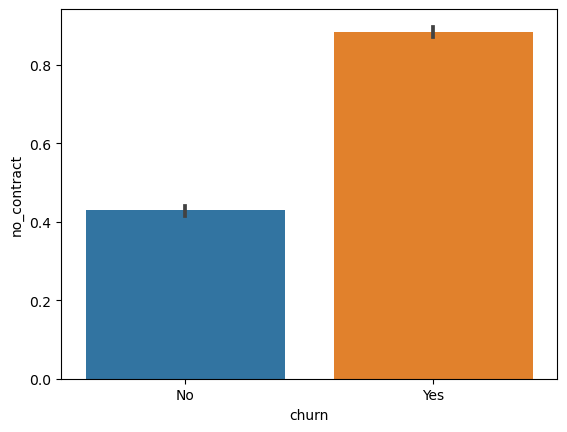

In [251]:
sns.barplot(data=telco,x='churn',y='no_contract')
plt.show()

Month to month client tend to churn more than client with a contract.



## Clients without dependent churn more than client with dependents?

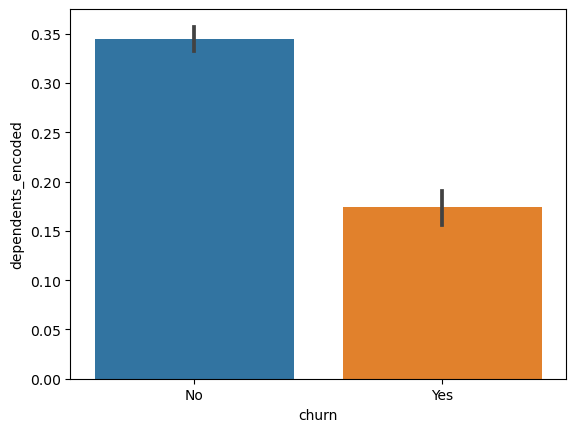

In [24]:
sns.barplot(data=telco,x='churn',y='dependents_encoded')
plt.show()

Clients with NO dependent tend to churn more thant client with dependents.

## Senior Citizen Clients tend to churn more than non-senior citizen clients?

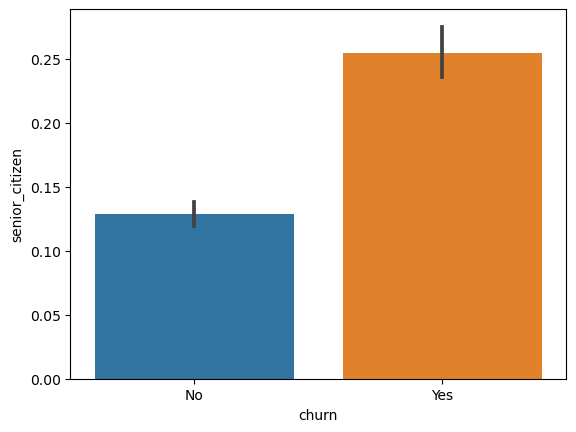

In [30]:
sns.barplot(data=telco,x='churn',y='senior_citizen')
plt.show()

Senior Citizen tend to churn more than clients who are not senior citizen.

## Clients without tech support tend to churn more than clients with tech support?
  ### Does service type affects the tech support/churning?

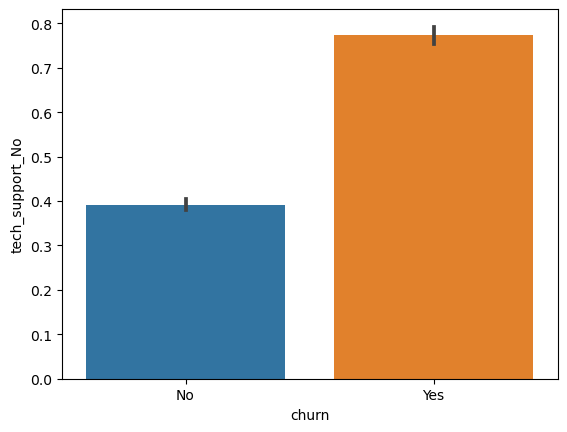

In [91]:
sns.barplot(data=telco,x='churn',y='tech_support_No')
plt.show()

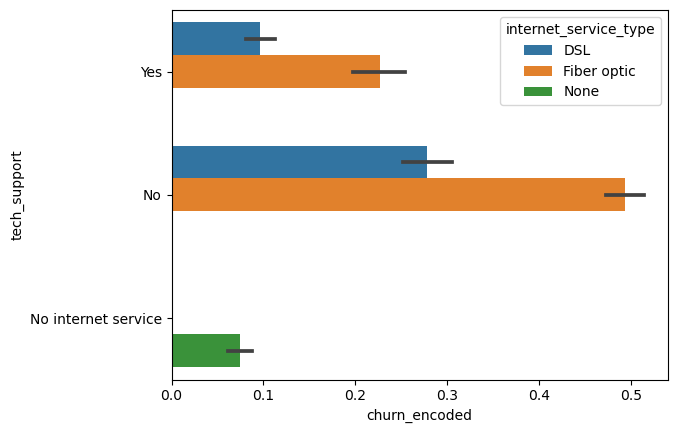

In [29]:
sns.barplot(data=telco,x='churn_encoded',y='tech_support',hue="internet_service_type")
plt.show()

## Clients with higher monthly charges tend to churn more than clients with low monthly charges?

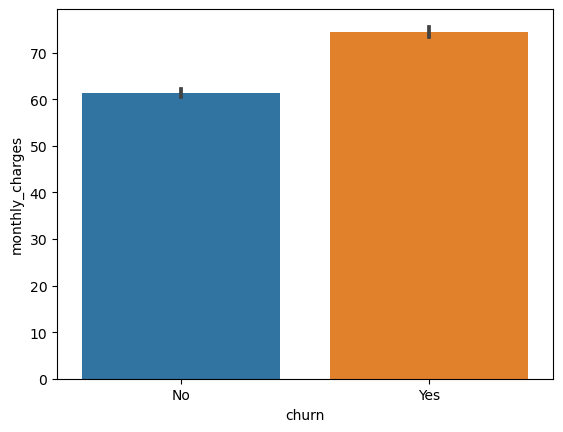

In [52]:
sns.barplot(data=telco,x='churn',y='monthly_charges')
plt.show()

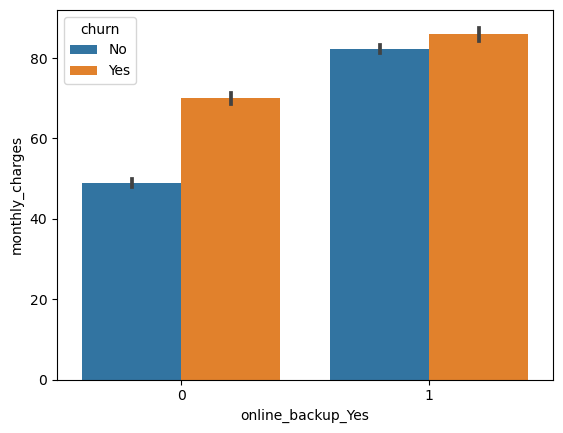

In [256]:
sns.barplot(data=telco,x='online_backup_Yes',y='monthly_charges', hue='churn')
plt.show()

# Statistical tests

### CHI SQUARE:
#### Do month-to-month clients churn more than contract clients?

In [21]:
observed=pd.crosstab(telco.churn,telco.no_contract)

In [22]:
chi2,p,degf,expected=stats.chi2_contingency(observed)
print('observed')
print(observed.values)
print('\nexpected')
print(expected.astype(int))
print('\n------')
print(f'chi^2={chi2:.4f}')
print(f'p={p}')

observed
[[2954 2220]
 [ 214 1655]]

expected
[[2327 2846]
 [ 840 1028]]

------
chi^2=1153.9717
p=6.147585925548493e-253


In [23]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


#### Clients without dependent churn more than client with dependents?

In [35]:
observed2=pd.crosstab(telco.churn,telco.dependents_encoded)
chi2,p,degf,expected=stats.chi2_contingency(observed2)
print('observed2')
print(observed2.values)
print('\nexpected')
print(expected.astype(int))
print('\n------')
print(f'chi^2={chi2:.4f}')
print(f'p={p}')

observed2
[[3390 1784]
 [1543  326]]

expected
[[3623 1550]
 [1309  559]]

------
chi^2=189.1292
p=4.9249216612154196e-43


In [36]:
if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


#### Senior Citizen Clients tend to churn more than non-senior citizen clients?

In [34]:
observed3=pd.crosstab(telco.churn,telco.senior_citizen)
chi2,p,degf,expected=stats.chi2_contingency(observed3)
print('observed3')
print(observed2.values)
print('\nexpected')
print(expected.astype(int))
print('\n------')
print(f'chi^2={chi2:.4f}')
print(f'p={p}')

if p < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

observed3
[[3390 1784]
 [1543  326]]

expected
[[4335  838]
 [1565  303]]

------
chi^2=159.4263
p=1.510066805092378e-36
we reject the null hypothesis


## T-TEST:
### Clients with higher monthly charges tend to churn more than clients with low monthly charges?


In [144]:
t,p=stats.ttest_ind(telco.monthly_charges,telco.churn_encoded)
t,p

(179.8639691593982, 0.0)

In [145]:
if p/2 < alpha:
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


## Classification tests
### Different models

In [204]:
x_train=telco[['monthly_charges','senior_citizen','dependents_encoded','tech_support_No','no_contract']]
y_train=telco.churn_encoded
x_validate=telco[['monthly_charges','senior_citizen','dependents_encoded','tech_support_No','no_contract']]
y_validate=telco.churn_encoded
x_test=telco[['monthly_charges','senior_citizen','dependents_encoded','tech_support_No','no_contract']]
y_test=telco.churn_encoded

In [76]:
telco.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [77]:
baseline_accuracy=5174/(5174+1869)
baseline_accuracy*100

73.4630129206304

## Logistic Regression:

In [95]:
lr=LogisticRegression(random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100

76.58668181172796

In [122]:
lr=LogisticRegression(C=0.5,random_state=123)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100

76.60088030668749

In [123]:
lr=LogisticRegression(class_weight='balanced',random_state=123)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100

71.31904018174073

In [210]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100


76.58668181172796

## Decision Tree Classfier :

In [175]:
train,validate,test=prep.split_data(telco,'churn')

In [197]:
x_train=telco.select_dtypes(exclude=['object']).drop(columns=['churn_encoded'])
y_train=telco.churn_encoded
x_validate=telco.select_dtypes(exclude=['object']).drop(columns=['churn_encoded'])
y_validate=telco.churn_encoded
x_test=telco.select_dtypes(exclude=['object']).drop(columns=['churn_encoded'])
y_test=telco.churn_encoded

In [179]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100

99.74442709072838

In [211]:
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100

77.12622462019027

# KNN Model:

In [207]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100, knn.score(x_validate,y_validate)*100

(82.2802782905012, 82.2802782905012)

In [206]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100, knn.score(x_validate,y_validate)*100

(79.00042595484878, 79.00042595484878)

In [254]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)*100, knn.score(x_validate,y_validate)*100

(82.2802782905012, 82.2802782905012)

In [208]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)*100

82.2802782905012

In [231]:
test_pred=knn.predict(x_test)
y_pred_proba5=knn5.predict_proba(X_train)

In [237]:
telco.customer_id

0       0002-ORFBO
1       0003-MKNFE
2       0004-TLHLJ
3       0011-IGKFF
4       0013-EXCHZ
           ...    
7038    9987-LUTYD
7039    9992-RRAMN
7040    9992-UJOEL
7041    9993-LHIEB
7042    9995-HOTOH
Name: customer_id, Length: 7043, dtype: object

In [245]:
# Prediction .csv
predictions = pd.concat([
    pd.DataFrame(telco.customer_id).reset_index().drop(columns='index'),
    pd.DataFrame(test_pred).rename(columns={0:'churn_prediction'}),
    pd.DataFrame(knn.predict_proba(
        x_test)*100).drop(columns=0).rename(
        columns={1:'churn_probability'})
],axis=1)
predictions

,customer_id,churn_prediction,churn_probability
0,0002-ORFBO,0,0.000000
1,0003-MKNFE,0,27.272727
2,0004-TLHLJ,1,63.636364
3,0011-IGKFF,1,90.909091
4,0013-EXCHZ,1,54.545455
...,...,...,...
7038,9987-LUTYD,0,9.090909
7039,9992-RRAMN,1,81.818182
7040,9992-UJOEL,0,18.181818
7041,9993-LHIEB,0,9.090909


In [246]:
predictions.to_csv('telco_predictions.csv', index=False)